In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [5]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [6]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [7]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [8]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [9]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [10]:
data['text'] = data['text'].str.lower()
data['label'] = LabelEncoder().fit_transform(data['label'])

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [11]:
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

X_train_scaled = sc.fit_transform(X_train_vectorized)
X_test_scaled = sc.transform(X_test_vectorized)

In [20]:
import time
start_time = time.time()
model = LogisticRegression(random_state=0)
model.fit(X_train_scaled, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 86.42273879051208 seconds


C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9799587309775599
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20317
           1       0.99      0.96      0.98     18453

    accuracy                           0.98     38770
   macro avg       0.98      0.98      0.98     38770
weighted avg       0.98      0.98      0.98     38770



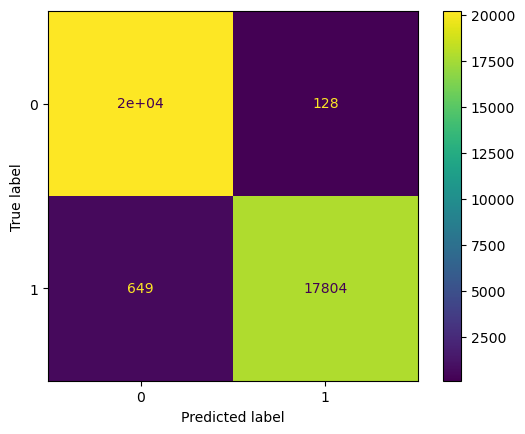

In [14]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(f"Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=model.classes_)
disp.plot()
plt.show()

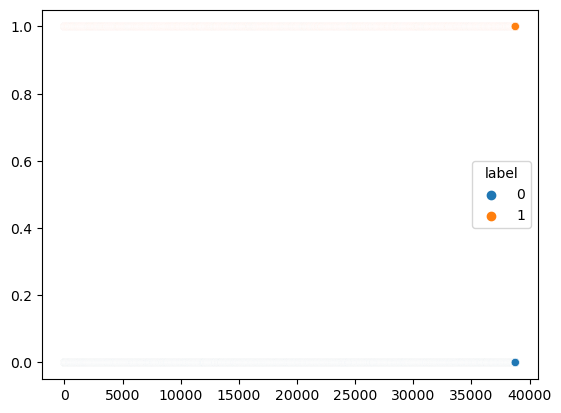

C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


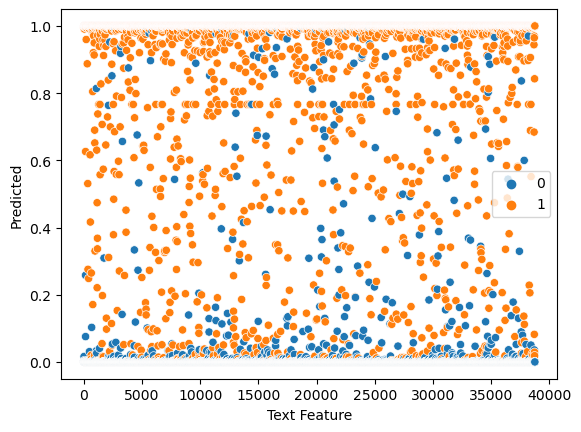

In [15]:
y_pred = y_pred.squeeze()
y_prob = model.predict_proba(X_test_scaled)

# Plot scatter plot
sns.scatterplot(x= range(len(y_pred)), y=y_pred, hue= Y_test)
plt.figure()
sns.scatterplot(x = range(len(y_pred)), y = y_prob[:,1], hue = Y_test)
plt.xlabel('Text Feature')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [16]:
labels = data['label']

## Before Classification 

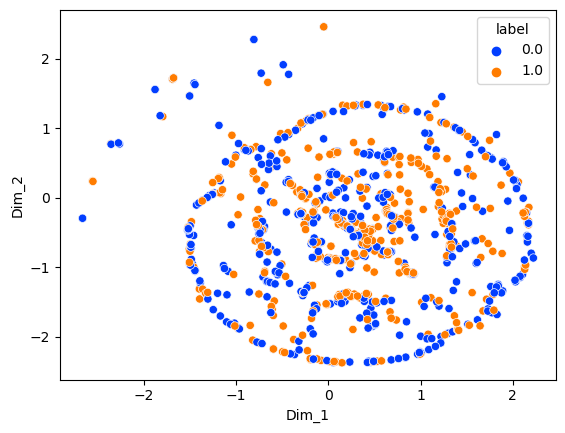

In [17]:
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = labels[0:1000]
 
model1 = TSNE(n_components = 2, random_state = 0, init = 'random')
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
 
tsne_data = model1.fit_transform(data_1000)
 
# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))
 
# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

## After Classification 

C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


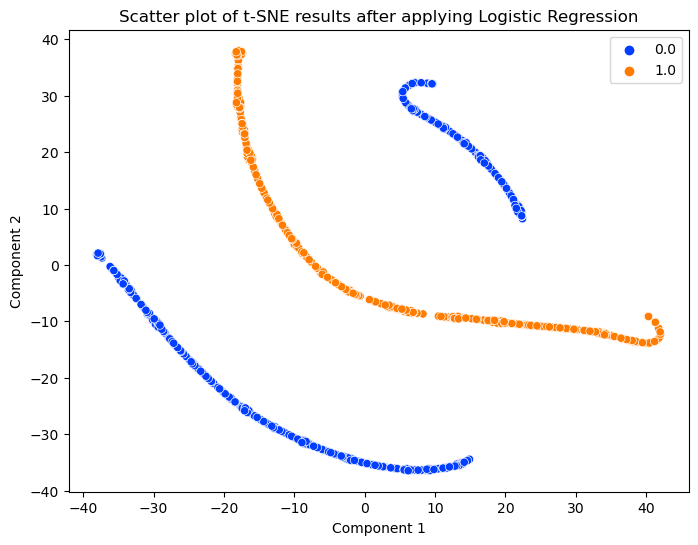

In [19]:
model2 = LogisticRegression(random_state = 0)
model2.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model2.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying Logistic Regression")
plt.legend()
plt.show()